Accidents align with identified blackspots.
Location with the most accidents (Lat, Long): (12.992198, 80.182455)


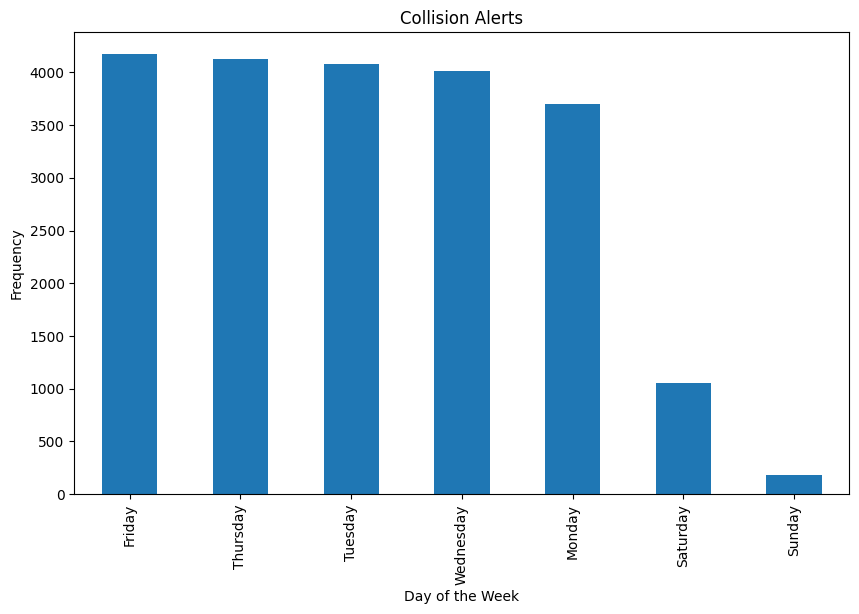

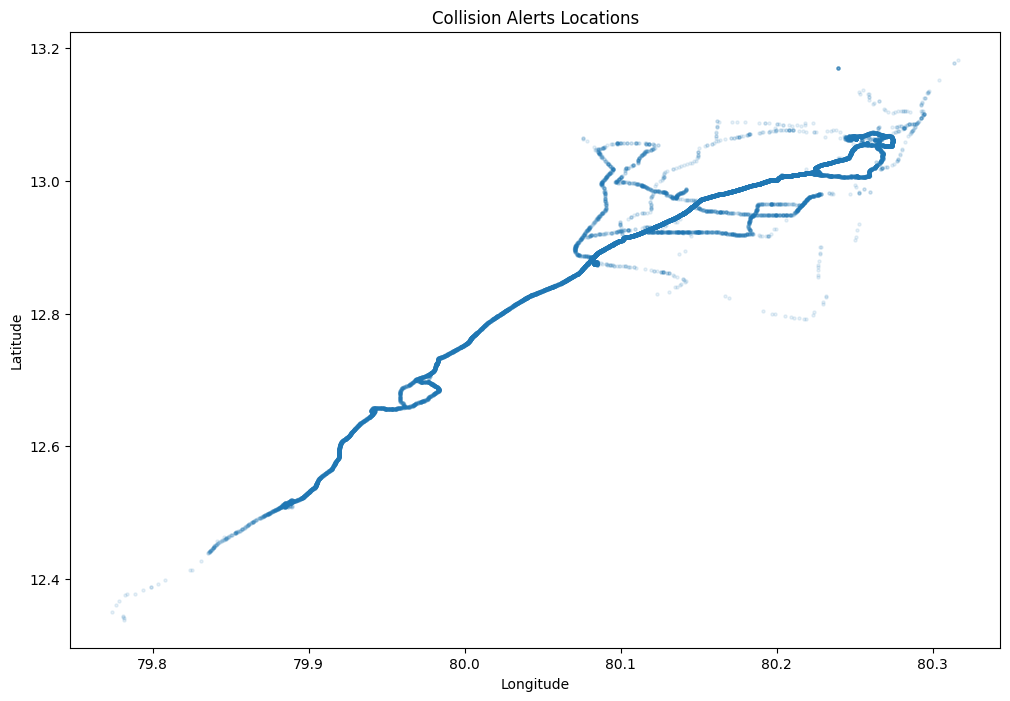

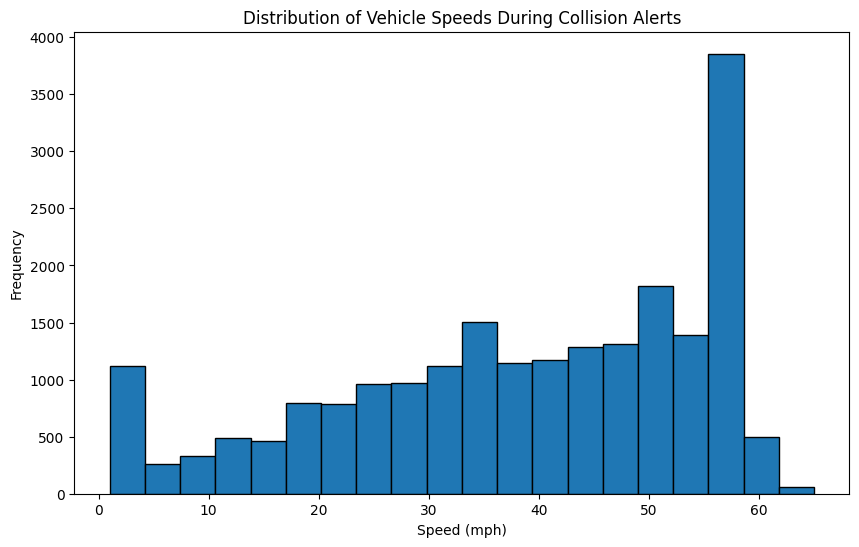

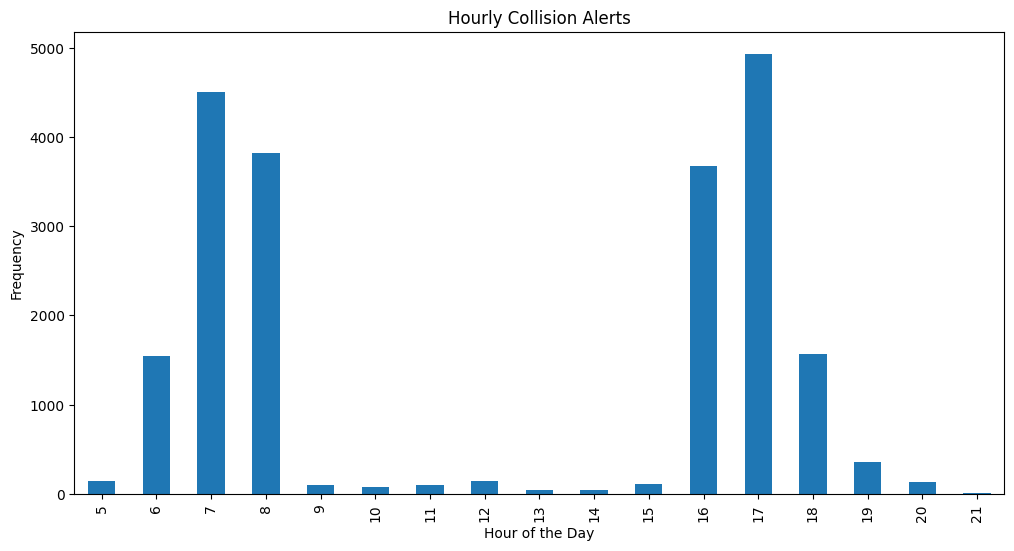

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
data = pd.read_csv('/content/data.csv')
blackspot_data = pd.read_csv('blackspots.csv')
merged_data = data.merge(blackspot_data, on=['Lat', 'Long'], how='inner')
if not merged_data.empty:
    print("Accidents align with identified blackspots.")
else:
    print("No alignment with identified blackspots.")
most_accidents_location = data['Lat'].mode().values[0], data['Long'].mode().values[0]
print("Location with the most accidents (Lat, Long):", most_accidents_location)
most_accidents_df = pd.DataFrame({'Lat': [most_accidents_location[0]], 'Long': [most_accidents_location[1]]})
most_accidents_df.to_csv('black.csv', index=False)
if 'Collision_Type' in data.columns:
    collision_counts = data['Collision_Type'].value_counts()
    plt.figure(figsize=(10, 6))
    collision_counts.plot(kind='bar')
    plt.title('Collision Type Distribution')
    plt.xlabel('Collision Type')
    plt.ylabel('Frequency')
data['Date'] = pd.to_datetime(data['Date'])
data['Day_of_Week'] = data['Date'].dt.day_name()
day_of_week_counts = data['Day_of_Week'].value_counts()
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar')
plt.title('Collision Alerts')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.figure(figsize=(12, 8))
plt.scatter(data['Long'], data['Lat'], alpha=0.1, s=5)
plt.title('Collision Alerts Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
accidents_with_speed = data[data['Speed'].notna()]
if 'Speed' in data.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(accidents_with_speed['Speed'], bins=20, edgecolor='k')
    plt.title('Distribution of Vehicle Speeds During Collision Alerts')
    plt.xlabel('Speed (mph)')
    plt.ylabel('Frequency')
if 'Lane_Departure' in data.columns:
    lane_departure_counts = data['Lane_Departure'].value_counts()
    plt.figure(figsize=(8, 5))
    lane_departure_counts.plot(kind='bar')
    plt.title('Lane Departure Warnings')
    plt.xlabel('Lane Departure Warning')
    plt.ylabel('Frequency')
if 'Headway_Monitoring' in data.columns:
    headway_counts = data['Headway_Monitoring'].value_counts()
    plt.figure(figsize=(8, 5))
    headway_counts.plot(kind='bar')
    plt.title('Headway Monitoring Warnings')
    plt.xlabel('Headway Monitoring Warning')
    plt.ylabel('Frequency')
data['Hour'] = pd.to_datetime(data['Time']).dt.hour
hourly_counts = data['Hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar')
plt.title('Hourly Collision Alerts')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
m = folium.Map(location=[data['Lat'].mean(), data['Long'].mean()], zoom_start=12)
for _, row in data.iterrows():
    folium.Marker([row['Lat'], row['Long']]).add_to(m)
m.save('accident_map.html')
plt.show()


Accidents align with identified blackspots.


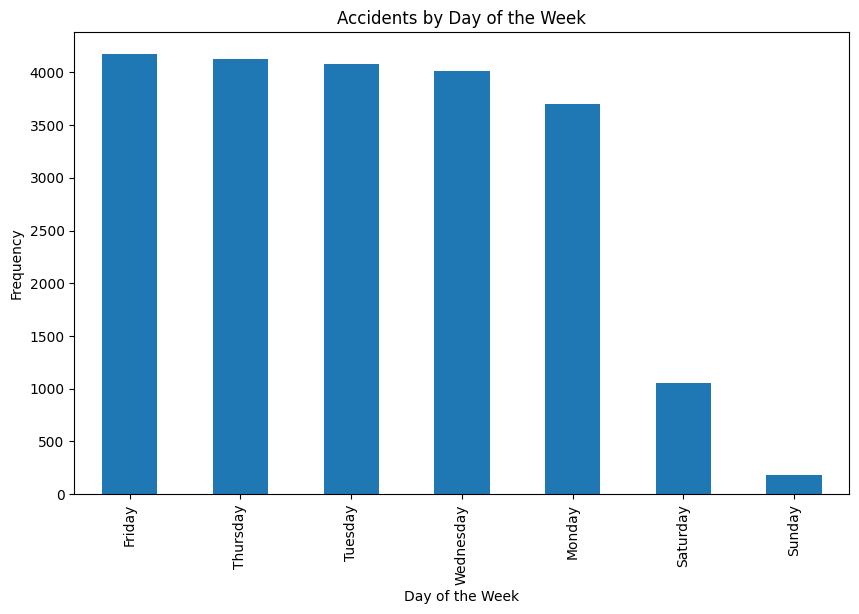

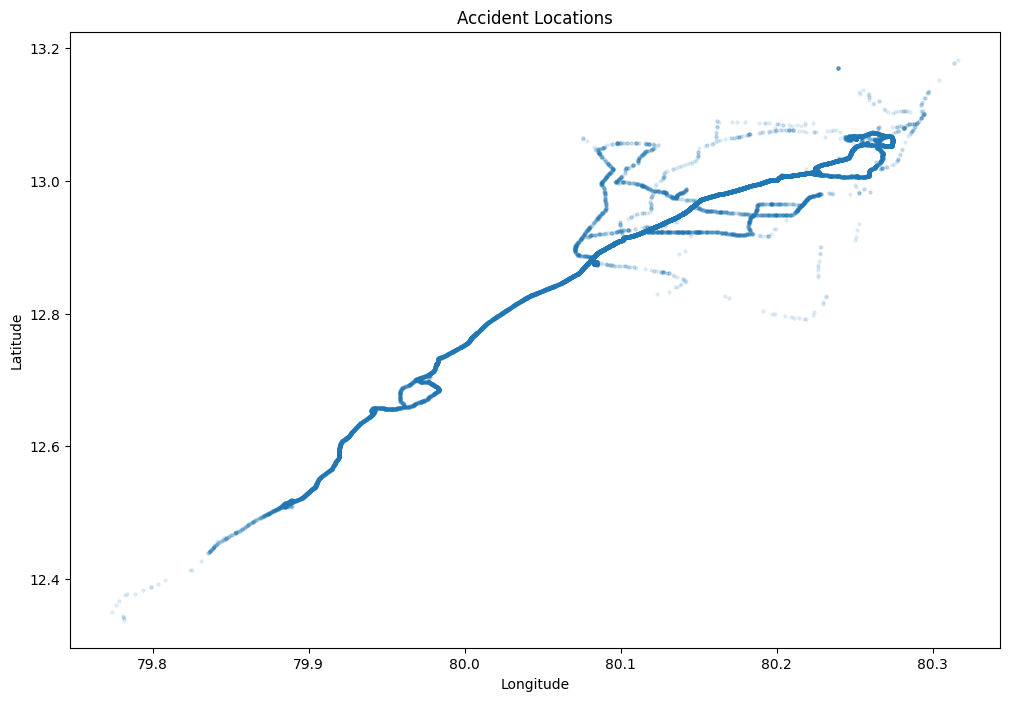

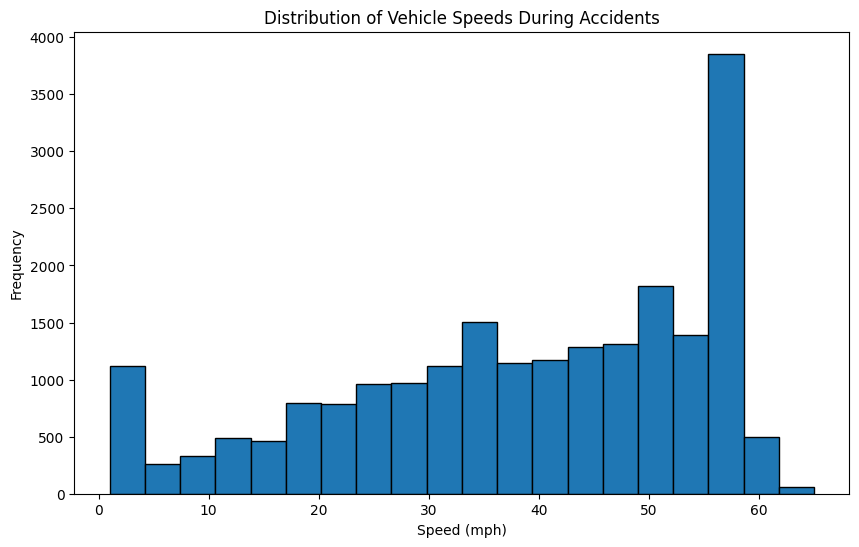

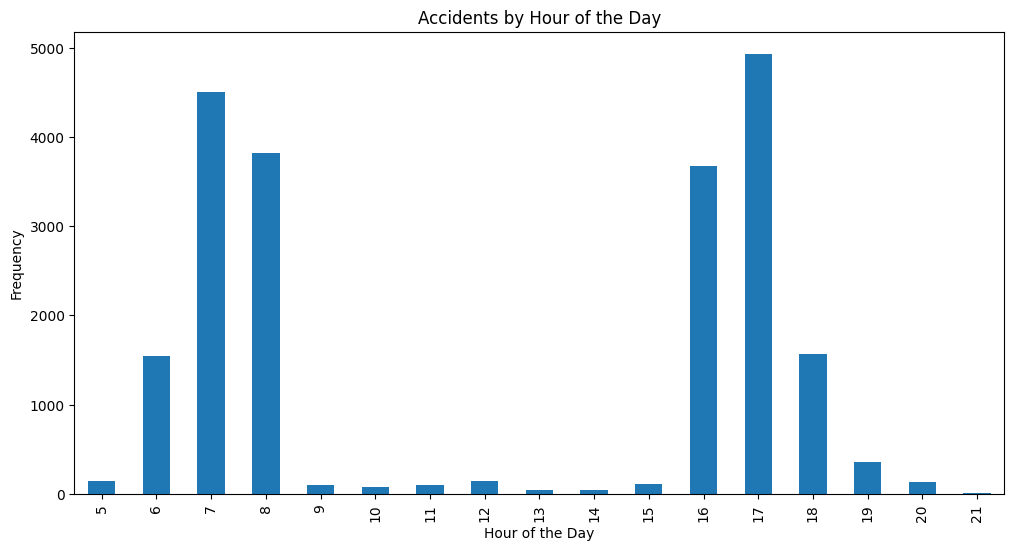

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
data = pd.read_csv('/content/data.csv')
blackspot_data = pd.read_csv('blackspots.csv')
merged_data = data.merge(blackspot_data, on=['Lat', 'Long'], how='inner')
if not merged_data.empty:
    print("Accidents align with identified blackspots.")
else:
    print("No alignment with identified blackspots.")
if 'Collision_Type' in data.columns:
    collision_counts = data['Collision_Type'].value_counts()
    plt.figure(figsize=(10, 6))
    collision_counts.plot(kind='bar')
    plt.title('Collision Type Distribution')
    plt.xlabel('Collision Type')
    plt.ylabel('Frequency')
data['Date'] = pd.to_datetime(data['Date'])
data['Day_of_Week'] = data['Date'].dt.day_name()
day_of_week_counts = data['Day_of_Week'].value_counts()
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.figure(figsize=(12, 8))
plt.scatter(data['Long'], data['Lat'], alpha=0.1, s=5)
plt.title('Accident Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
accidents_with_speed = data[data['Speed'].notna()]
if 'Speed' in data.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(accidents_with_speed['Speed'], bins=20, edgecolor='k')
    plt.title('Distribution of Vehicle Speeds During Accidents')
    plt.xlabel('Speed (mph)')
    plt.ylabel('Frequency')
if 'Lane_Departure' in data.columns:
    lane_departure_counts = data['Lane_Departure'].value_counts()
    plt.figure(figsize=(8, 5))
    lane_departure_counts.plot(kind='bar')
    plt.title('Lane Departure Warnings')
    plt.xlabel('Lane Departure Warning')
    plt.ylabel('Frequency')
if 'Headway_Monitoring' in data.columns:
    headway_counts = data['Headway_Monitoring'].value_counts()
    plt.figure(figsize=(8, 5))
    headway_counts.plot(kind='bar')
    plt.title('Headway Monitoring Warnings')
    plt.xlabel('Headway Monitoring Warning')
    plt.ylabel('Frequency')
data['Hour'] = pd.to_datetime(data['Time']).dt.hour
hourly_counts = data['Hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
place_counts = data.groupby(['Lat', 'Long']).size().reset_index(name='Accident_Count')
place_counts = place_counts.sort_values(by='Accident_Count', ascending=True)
place_counts.to_csv('black.csv', index=False)
m = folium.Map(location=[data['Lat'].mean(), data['Long'].mean()], zoom_start=12)
for _, row in data.iterrows():
    folium.Marker([row['Lat'], row['Long']]).add_to(m)
m.save('accident_map.html')
plt.show()


Accidents align with identified blackspots.


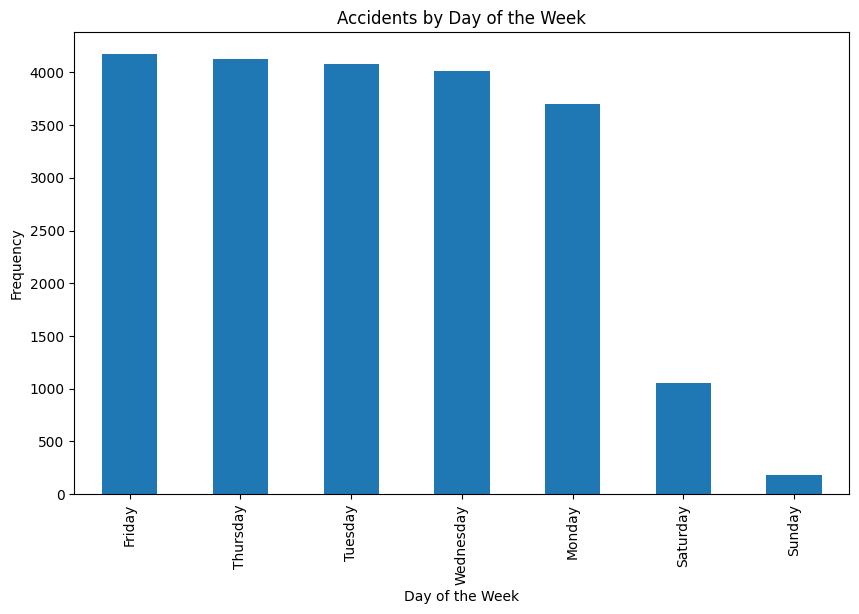

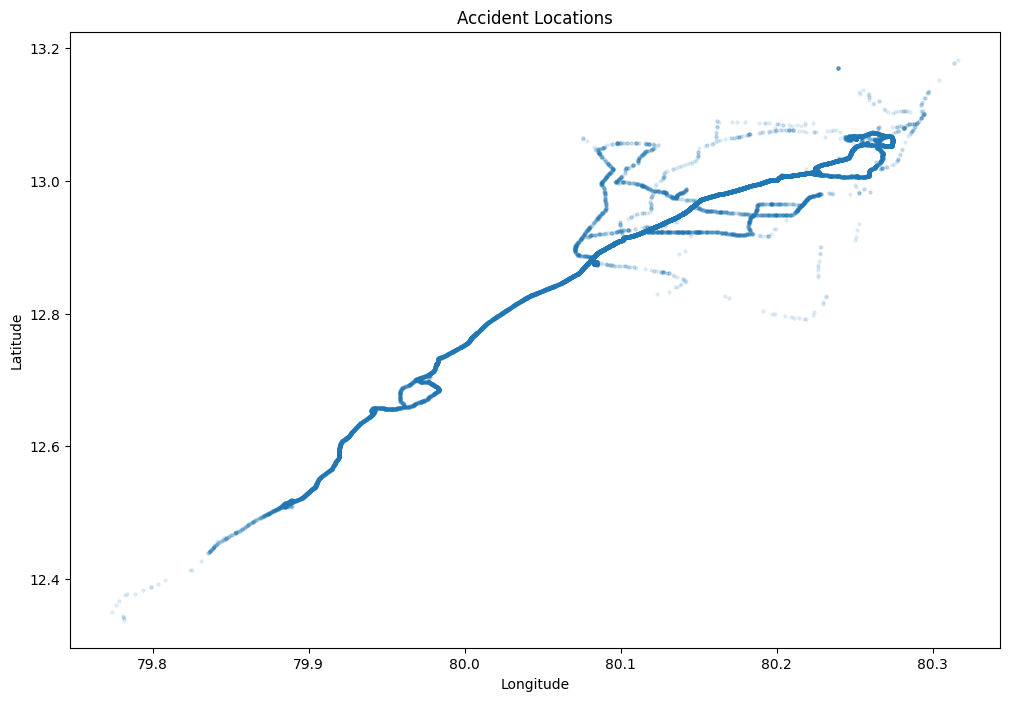

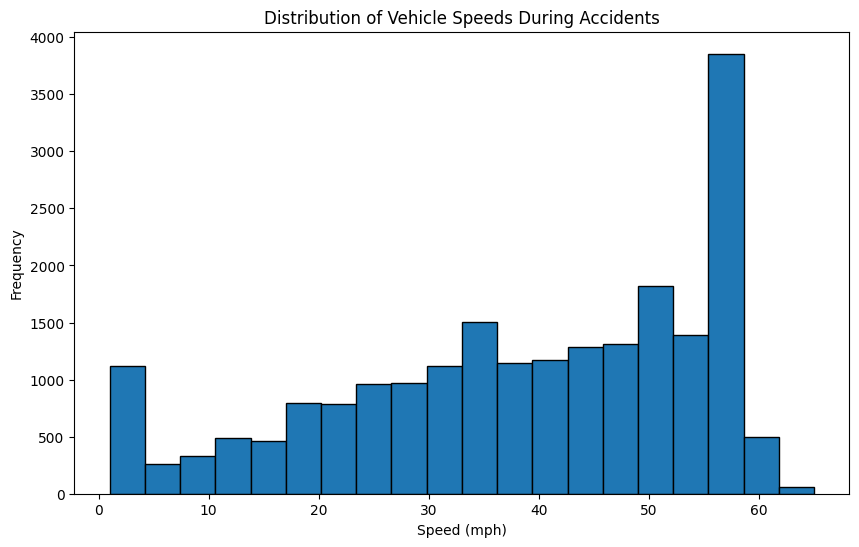

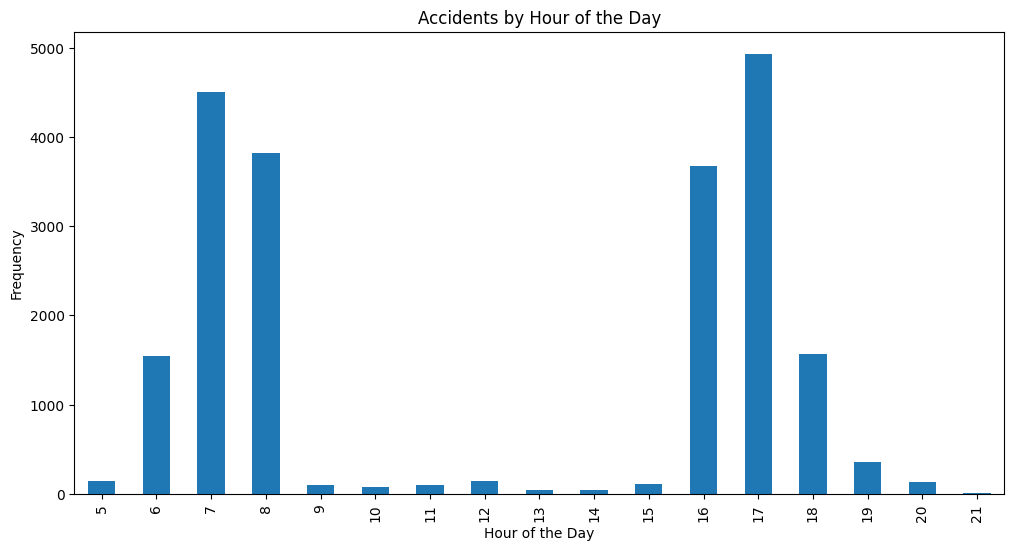

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
data = pd.read_csv('/content/data.csv')
blackspot_data = pd.read_csv('blackspots.csv')
merged_data = data.merge(blackspot_data, on=['Lat', 'Long'], how='inner')
if not merged_data.empty:
    print("Accidents align with identified blackspots.")
else:
    print("No alignment with identified blackspots.")
accident_counts = data.groupby(['Lat', 'Long']).size().reset_index(name='AccidentCount')
accident_counts = accident_counts.sort_values(by='AccidentCount', ascending=False)
accident_counts.to_csv('black.csv', index=False)
if 'Collision_Type' in data.columns:
    collision_counts = data['Collision_Type'].value_counts()
    plt.figure(figsize=(10, 6))
    collision_counts.plot(kind='bar')
    plt.title('Collision Type Distribution')
    plt.xlabel('Collision Type')
    plt.ylabel('Frequency')
data['Date'] = pd.to_datetime(data['Date'])
data['Day_of_Week'] = data['Date'].dt.day_name()
day_of_week_counts = data['Day_of_Week'].value_counts()
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.figure(figsize=(12, 8))
plt.scatter(data['Long'], data['Lat'], alpha=0.1, s=5)
plt.title('Accident Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
accidents_with_speed = data[data['Speed'].notna()]
if 'Speed' in data.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(accidents_with_speed['Speed'], bins=20, edgecolor='k')
    plt.title('Distribution of Vehicle Speeds During Accidents')
    plt.xlabel('Speed (mph)')
    plt.ylabel('Frequency')
if 'Lane_Departure' in data.columns:
    lane_departure_counts = data['Lane_Departure'].value_counts()
    plt.figure(figsize=(8, 5))
    lane_departure_counts.plot(kind='bar')
    plt.title('Lane Departure Warnings')
    plt.xlabel('Lane Departure Warning')
    plt.ylabel('Frequency')
if 'Headway_Monitoring' in data.columns:
    headway_counts = data['Headway_Monitoring'].value_counts()
    plt.figure(figsize=(8, 5))
    headway_counts.plot(kind='bar')
    plt.title('Headway Monitoring Warnings')
    plt.xlabel('Headway Monitoring Warning')
    plt.ylabel('Frequency')
data['Hour'] = pd.to_datetime(data['Time']).dt.hour
hourly_counts = data['Hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
m = folium.Map(location=[data['Lat'].mean(), data['Long'].mean()], zoom_start=12)
for _, row in data.iterrows():
    folium.Marker([row['Lat'], row['Long']]).add_to(m)
m.save('accident_map.html')
plt.show()
